In [2]:
import os
from glob import glob
from pathlib import Path
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import sklearn as sk
import pickle
import copy
import time

import plotly.graph_objs as go
import plotly.io as pio
import plotly.figure_factory as ff

In [3]:
single_data = pd.read_csv('/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/single_emo_facial_no_time_6.csv')
mix_data = pd.read_csv('/Users/jiachenyao/Desktop/Thesis/Preprocessed_data/Mixed_emotions_noratio_notime_6.csv')

In [4]:
emo_df = pd.concat([single_data, mix_data], ignore_index=True)

In [5]:
emo_df

,emotion,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,...,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r
0,ang,0.917503,0.766532,0.057074,0.205080,0.444954,0.046578,0.374314,0.536626,0.711955,...,0.057786,0.052987,0.079312,0.058639,0.077180,0.074079,0.000603,0.060482,0.125585,0.036564
1,ang,0.917492,0.759551,0.824821,0.204106,0.420693,0.802704,0.382197,0.520008,0.000010,...,0.021376,0.015062,0.025221,0.021683,0.009924,0.020309,0.108037,0.012419,0.010970,0.078570
2,ang,0.917470,0.766109,0.054901,0.204885,0.444506,0.044858,0.374139,0.536174,0.699639,...,0.048869,0.049754,0.054764,0.040785,0.068028,0.060308,0.000000,0.056535,0.108252,0.011743
3,ang,0.917486,0.766649,0.056204,0.205062,0.446002,0.049195,0.374267,0.537164,0.713404,...,0.054679,0.055362,0.076061,0.051451,0.077406,0.074615,0.000000,0.060127,0.129208,0.031315
4,ang,0.917537,0.766770,0.058228,0.205217,0.446665,0.052150,0.374425,0.537498,0.722602,...,0.065956,0.059389,0.102962,0.074667,0.083360,0.089385,0.000000,0.068716,0.144121,0.060673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847,mix_ang_disg,0.198816,0.070197,0.830224,0.366626,0.923686,0.808791,0.836908,0.549053,0.000009,...,0.007148,0.010157,0.059374,0.011227,0.013960,0.157379,0.054221,0.012730,0.048321,0.127149
6848,mix_ang_disg,0.209229,0.070575,0.014245,0.366760,0.924265,0.031781,0.837624,0.551245,0.701822,...,0.276620,0.170232,0.000000,0.079788,0.072063,0.000000,0.000000,0.124613,0.027930,0.000000
6849,mix_ang_disg,0.209284,0.070687,0.018281,0.366848,0.924330,0.037970,0.837710,0.551602,0.711801,...,0.294609,0.185206,0.023094,0.087519,0.084710,0.000000,0.011235,0.138040,0.042159,0.000000
6850,mix_ang_disg,0.209357,0.070743,0.020961,0.366958,0.924360,0.042608,0.837792,0.551761,0.715497,...,0.319022,0.201756,0.047856,0.096271,0.099982,0.004679,0.021287,0.146825,0.070089,0.009974


In [6]:
std = emo_df.drop(columns='emotion').std().sort_values(ascending=False)

# Create bar chart using Plotly
fig_std = go.Figure()
fig_std.add_trace(go.Bar(x=std.index, y=std.values, marker_color='blue'))

fig_std.update_layout(
    title='Standard Deviation of Features in Dataset',
    xaxis_title='Feature',
    yaxis_title='Standard Deviation',
    font=dict(size=4),
    width=1200, # specify width in pixels
    height=600

)

fig_std.show()


In [7]:
# Filter the std Series by the condition std > 0.05
selected_features = std[std > 0.05].index.tolist()

print(len(selected_features))

684


In [8]:
X_selected = emo_df.loc[:, selected_features]


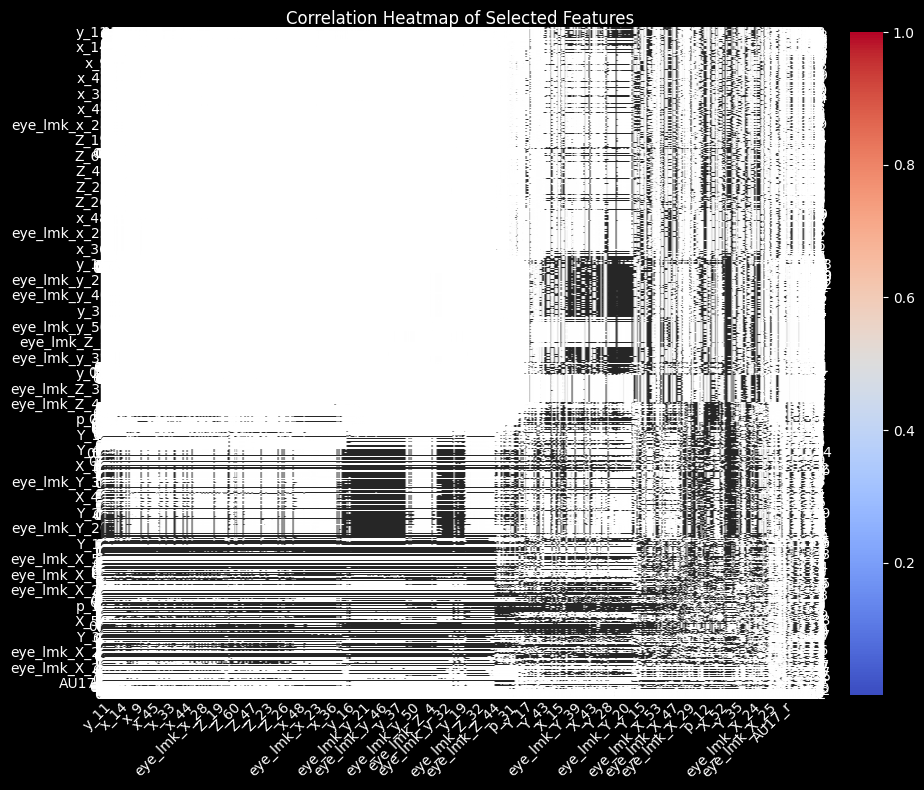

In [9]:
# Compute the correlation matrix
corr_matrix = X_selected.corr().abs()

# Create a figure and axis objects using Matplotlib
fig_cor, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap using Seaborn's heatmap function
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Customize the plot
ax.set_title('Correlation Heatmap of Selected Features')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')
ax.tick_params(axis='both', which='both', length=0)

# Display the plot
plt.tight_layout()
plt.show()

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_3494/2570256348.py:16: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.

/var/folders/h4/3nv1jvkx1yl21fmm86sb8ggh0000gn/T/ipykernel_3494/2570256348.py:22: UserWarning:

Attempting to set identical low and high xlims makes transformation singular; automatically expanding.



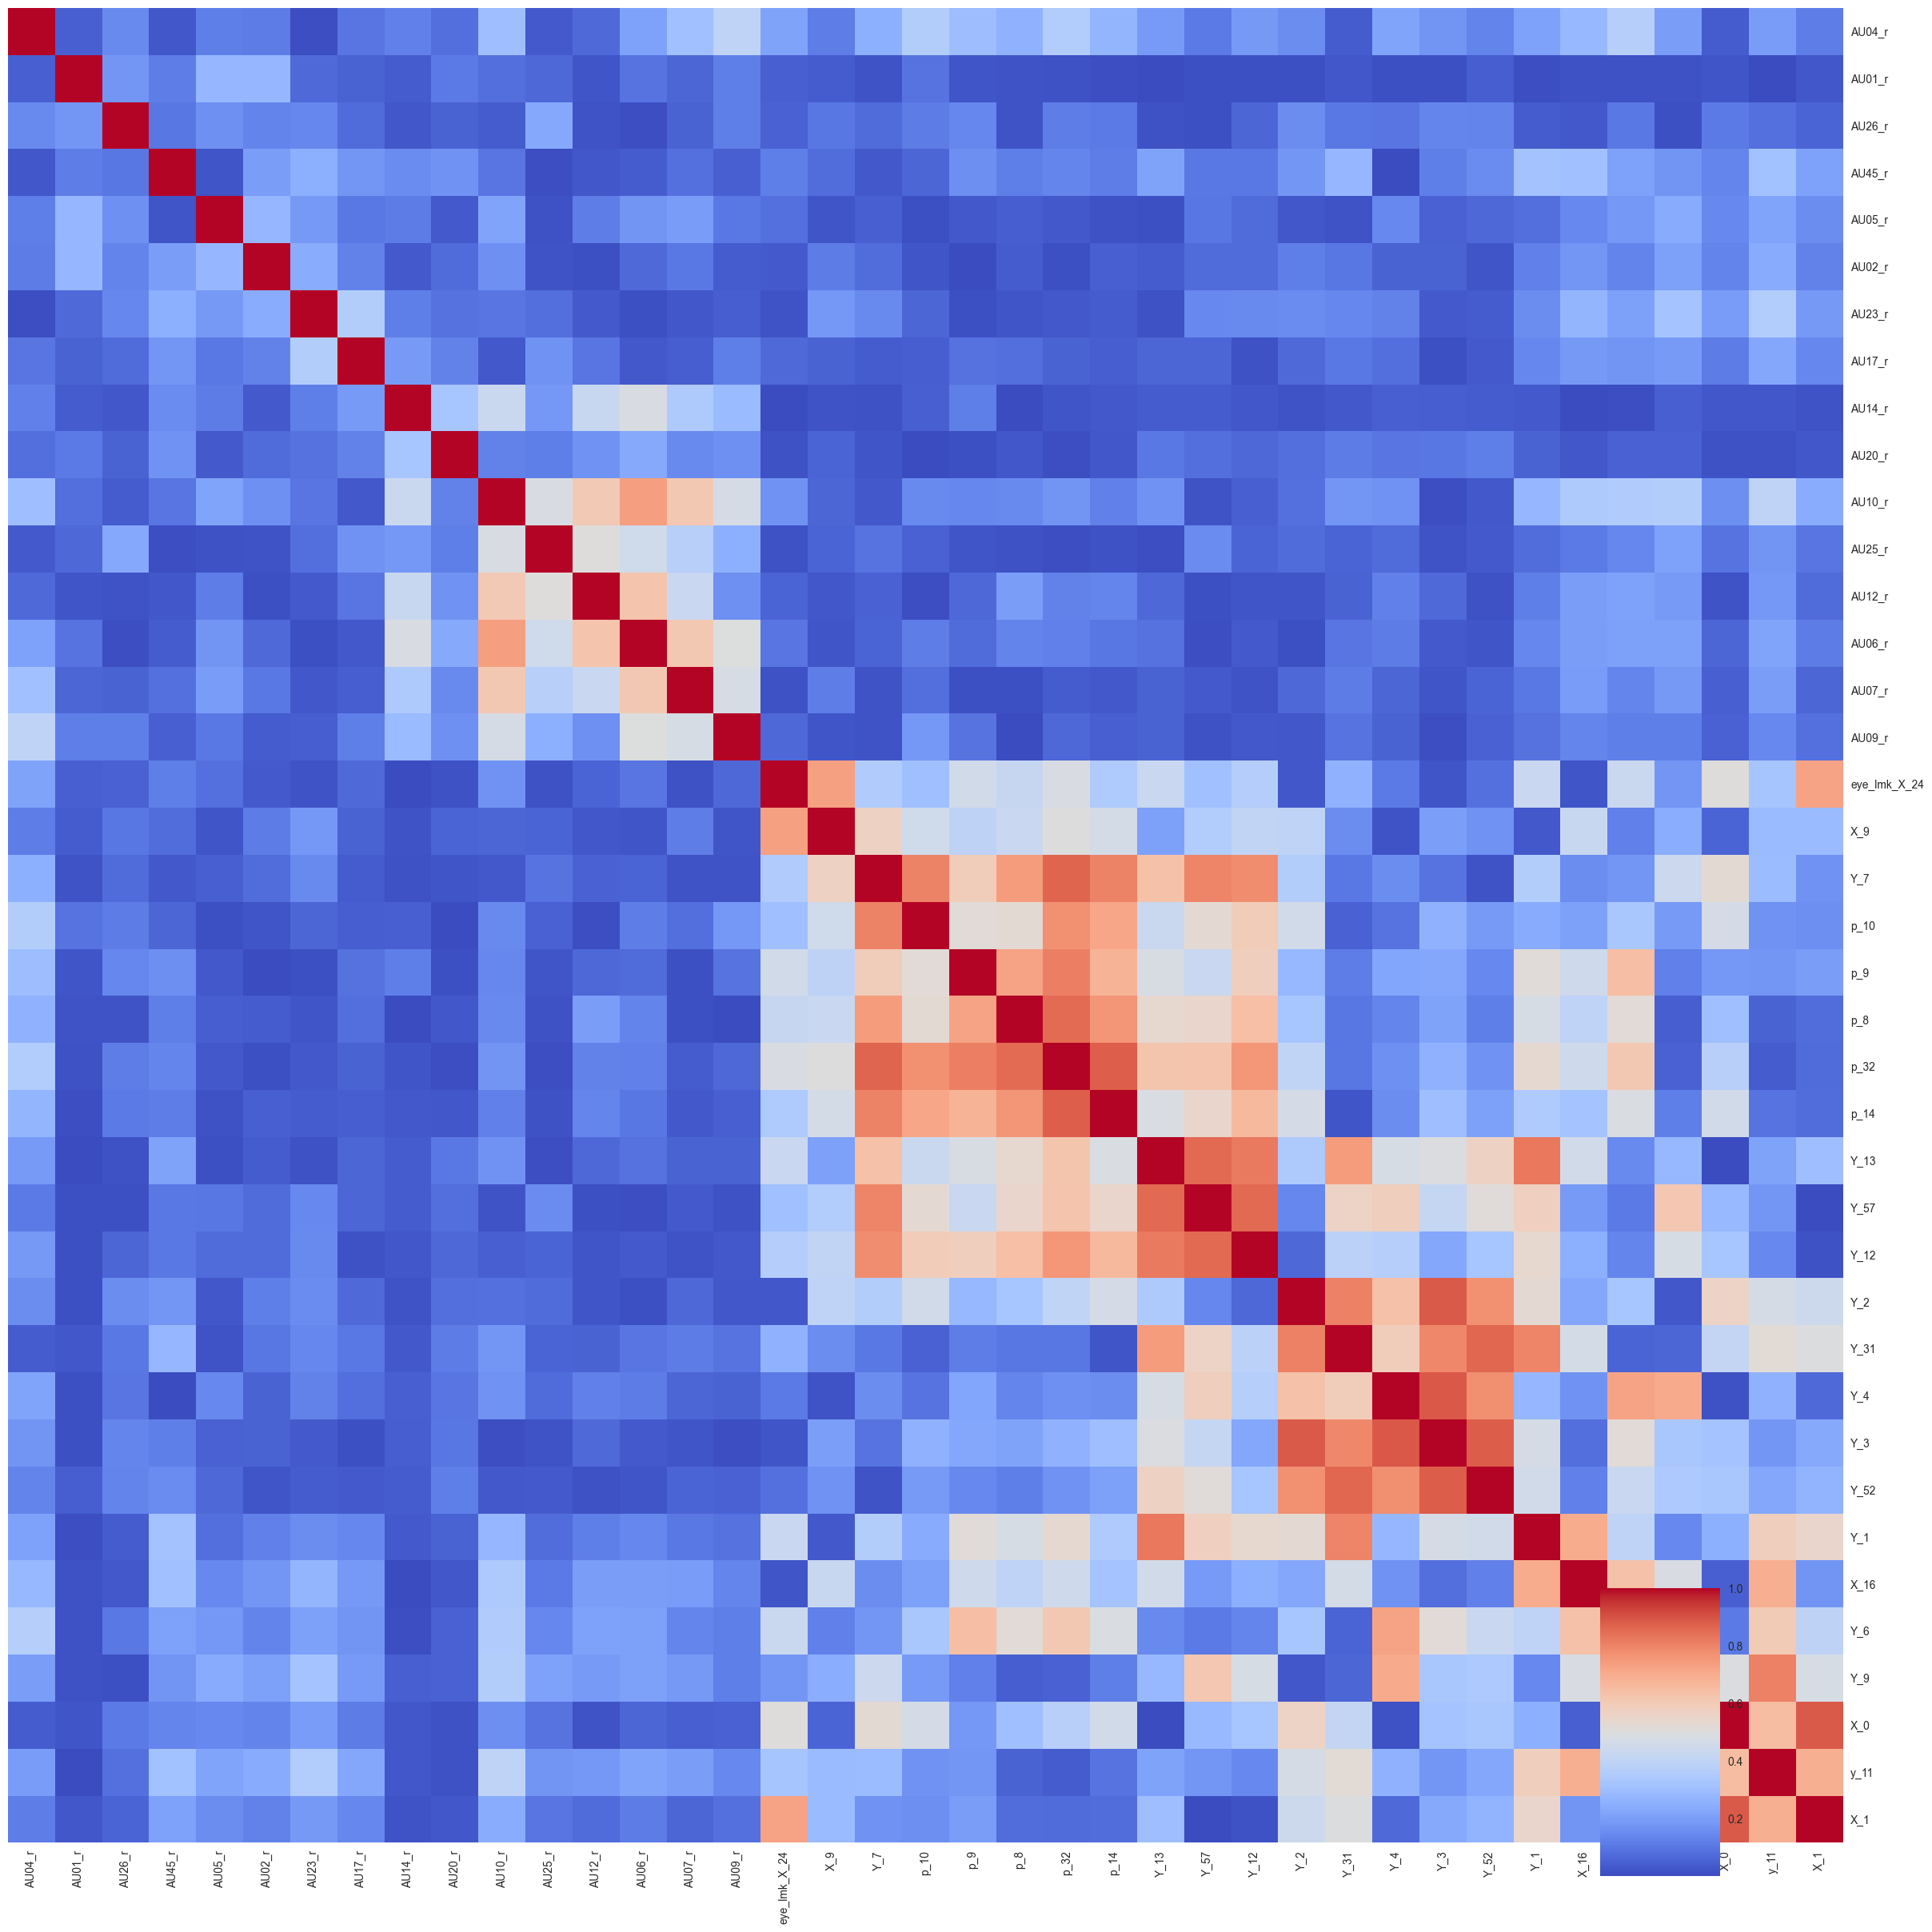

Number of features before dimensionality reduction: 684
Number of features after dimensionality reduction: 39


In [10]:
# Split the dataset into features (X) and target variable (y)
y = emo_df['emotion']

# Select the upper triangle of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the features to drop based on the correlation tolerance of 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Drop the highly correlated features
X_reduced = X_selected.drop(to_drop, axis=1)

# Concatenate the reduced feature set with the target variable
reduced_df = pd.concat([X_reduced, y], axis=1)

plt.style.use('seaborn')
# Create a clustered heatmap of the correlation matrix for the reduced feature set
cg = sns.clustermap(X_reduced.corr().abs(), cmap='coolwarm', metric='cityblock', 
                    cbar_pos=(0.86, 0.025, 0.05, 0.12), figsize=(30,30))
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)
cg.ax_row_dendrogram.set_xlim([0,0])
#plt.savefig('path/to/heatmap.png', bbox_inches='tight')
plt.show()

# Print the number of features before and after dimensionality reduction
print('Number of features before dimensionality reduction:', len(X_selected.columns))
print('Number of features after dimensionality reduction:', len(X_reduced.columns))

In [11]:
X_reduced.columns

Index(['y_11', 'p_32', 'X_16', 'Y_9', 'Y_7', 'Y_6', 'Y_3', 'Y_1', 'X_0', 'Y_4',
       'Y_13', 'Y_2', 'AU04_r', 'Y_52', 'Y_57', 'Y_31', 'X_1', 'eye_lmk_X_24',
       'X_9', 'AU10_r', 'AU12_r', 'p_10', 'AU45_r', 'AU06_r', 'AU05_r',
       'AU02_r', 'p_8', 'AU23_r', 'AU07_r', 'p_14', 'AU25_r', 'AU17_r',
       'AU14_r', 'Y_12', 'AU01_r', 'AU20_r', 'AU09_r', 'p_9', 'AU26_r'],
      dtype='object')